In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import locally_linear_embedding, TSNE, Isomap, MDS
from sklearn.decomposition import PCA
import seaborn as sns
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import time
import lightgbm as lgb
from sklearn.metrics import log_loss, roc_auc_score, confusion_matrix, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
import gc
from sklearn.linear_model import LogisticRegression
import math

In [10]:
SEED = 42
# seed function
def seed_everything(seed = 42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    
# set seed
seed_everything(SEED)

In [11]:
# Möbius band is based on the following code https://github.com/gt11799/mobiusband/blob/master/mobiusband.py

In [20]:
SAMPLE = 500  # number of sample

def func_x(v, u):
    answer = [((1. + v / 2. * math.cos(value_u/2.)) * math.cos(value_u)) for value_u in u]
    return np.array(answer)
    
def func_y(v, u):
    answer = [((1. + v / 2. * math.cos(value_u/2.)) * math.sin(value_u)) for value_u in u]
    return np.array(answer)

def func_z(v, u):
    answer = [(v / 2. * math.sin(value_u/2.)) for value_u in u]
    return np.array(answer)


def mobiusband():
    v = np.linspace(-1.0, 1.0, num=SAMPLE, endpoint=True)
    u = np.linspace(0, 2*math.pi, num=SAMPLE, endpoint=True)
    X = func_x(v, u)
    Y = func_y(v, u)
    Z = func_z(v, u)
    
    fig = plt.figure(dpi=150)
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z,  alpha=0.9, linewidth=0)
    ax.set_zlim(-2., 2.) #longthen z_axes
    plt.axis('off')
    fig.savefig('mobiusband.png', transparent=True, dpi=600)
    
    plt.show()


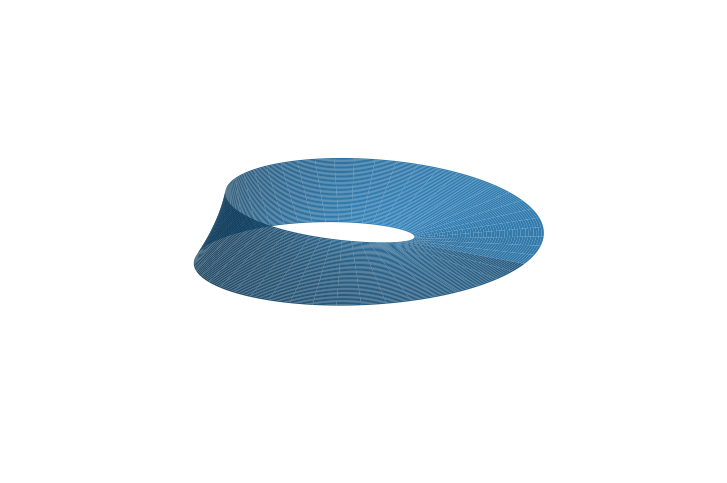

In [21]:
mobiusband()

In [41]:
v = np.linspace(-1.0, 1.0, num=SAMPLE, endpoint=True)
u = np.linspace(0, 2*math.pi, num=SAMPLE, endpoint=True)
X = func_x(v, u)
Y = func_y(v, u)
Z = func_z(v, u)

In [42]:
X = np.array([np.ravel(X), np.ravel(Y), np.ravel(Z)]).T

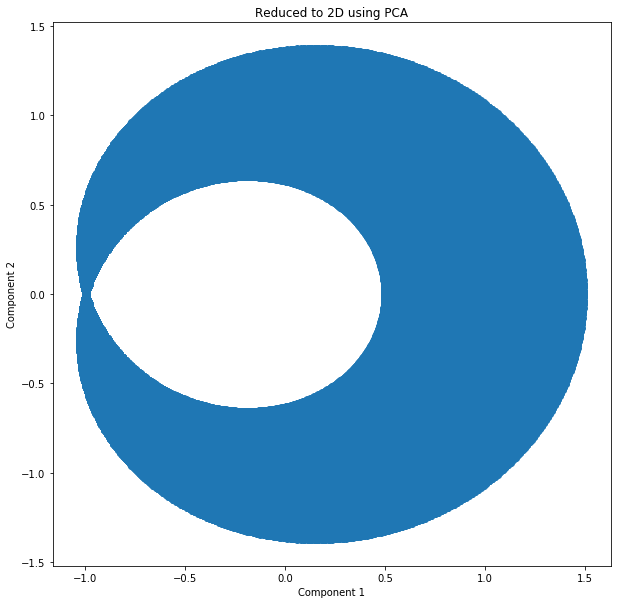

In [43]:
# PCA on 2-dimensions
pca = PCA(n_components=2, random_state=111)
pca.fit(X)
pca_X = pca.transform(X)

# Plot data with dimensionality reduction PCA
fig = plt.figure(figsize=(10, 10))
plt.scatter(pca_X[:,0], pca_X[:,1], marker='o', cmap=plt.cm.Spectral)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Reduced to 2D using PCA')

plt.savefig('./pca_reduce.png', transparent=True)

In [45]:
X_r, err = locally_linear_embedding(X, n_neighbors=12,
                                             n_components=2)

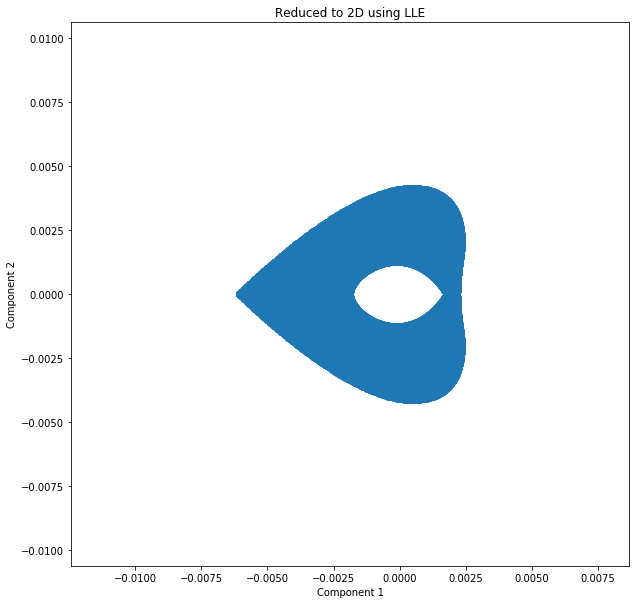

In [46]:
# LLE

# Plot data with dimensionality reduction PCA
fig = plt.figure(figsize=(10, 10))
plt.scatter(X_r[:,0], X_r[:,1], marker='o', cmap=plt.cm.Spectral)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Reduced to 2D using LLE')

plt.savefig('./LLE_reduce.png', transparent=True)